In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import contextily as ctx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [51]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr10"
})
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [52]:
india_plant = pd.read_excel('exposures/exposures_coal.xlsx')
map_india = gpd.read_file('shape_file/DISTRICT_BOUNDARY.shp')
map_india = map_india.to_crs(epsg=4326)

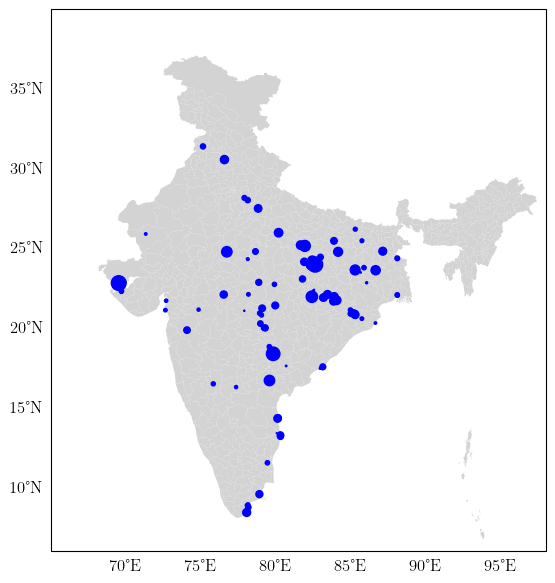

In [71]:
geometry = [Point(xy) for xy in zip(india_plant['longitude'], india_plant['latitude'])]
gdf = gpd.GeoDataFrame(india_plant, geometry=geometry, crs="EPSG:4326")

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

map_india.plot(ax=ax, facecolor='lightgray', transform=proj)

gdf.plot(ax=ax, color='blue', markersize=india_plant['value']/50000000, transform=proj)

ax.set_extent([65, 98, 6, 40], crs=proj)

gl = ax.gridlines(draw_labels=True, linewidth=0, color='none')
gl.top_labels = False
gl.right_labels = False

plt.tight_layout()
plt.show()